# **SISTEMA AVANZADO DE PREDICCIÓN INMOBILIARIA**

### **RECOPILACIÓN DE LOS DATOS**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/AkkaJaiderpls/HomeForecast-AI/master/DATA/SP_NON-PROCESSED.csv 2> /dev/null

In [ ]:
df = pd.read_csv('SP_NON-PROCESSED.csv', encoding='utf-8')
df.head(10)

,Street,City,propertycard__detailvalue,quartos,banheiros,vagas,price
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000
5,Rua Graham Bell,"Santo Amaro, São Paulo",440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31","Cidade Mãe do Céu, São Paulo",145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150","Jardim Vergueiro, São Paulo",150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8","Jardim Benfica, São Paulo",46-50,2,1,1,R$ 199.900
9,Rua Tapaji,"Vila Alpina, São Paulo",114,3,3,2,R$ 585.000


### **PREPROCESAMIENTO DE LOS DATOS**

In [ ]:
df.dtypes

Street                       object
City                         object
propertycard__detailvalue    object
quartos                      object
banheiros                    object
vagas                        object
price                        object
dtype: object

In [ ]:
# Procesar columnas con rangos y convertirlos en promedio
def process_range_values(column):
    processed = []
    for value in column:
        if '-' in str(value):
            range_values = value.split('-')
            average = sum([int(num) for num in range_values]) / len(range_values)
            processed.append(round(average))
        else:
            processed.append(int(value))
    return processed

# Procesar las columnas 'propertycard__detailvalue', 'quartos', 'banheiros', y 'vagas'
df['propertycard__detailvalue'] = process_range_values(df['propertycard__detailvalue'])
df['quartos'] = process_range_values(df['quartos'])
df['banheiros'] = process_range_values(df['banheiros'])
df['vagas'] = process_range_values(df['vagas'])

# Procesar la columna 'price' para remover el texto y convertir a valor numérico
df['price'] = df['price'].replace('[\D]', '', regex=True).astype(int)

# Vista previa de los datos después del preprocesamiento
df.head()


,Street,City,propertycard__detailvalue,quartos,banheiros,vagas,price
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,7000000
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",496,4,4,4,3700000
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,380000
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,685000
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,540000


In [ ]:
df.dtypes

Street                       object
City                         object
propertycard__detailvalue     int64
quartos                       int64
banheiros                     int64
vagas                         int64
price                         int64
dtype: object

In [ ]:
df['Street'] = df['Street'].str.replace(r'\d+', '')
df['Street'] = df['Street'].str.replace(',', '')
df['Street'] = df['Street'].str.strip()
df.head()

<ipython-input-48-c10f7bcd8c60>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Street'] = df['Street'].str.replace(r'\d+', '')


,Street,City,propertycard__detailvalue,quartos,banheiros,vagas,price
0,Avenida Itacira,"Planalto Paulista, São Paulo",1000,4,8,6,7000000
1,Rua Aurelia Perez Alvarez,"Jardim dos Estados, São Paulo",496,4,4,4,3700000
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,380000
3,Jardim Morumbi São Paulo,SP,310,3,2,4,685000
4,Rua Tobias Barreto,"Mooca, São Paulo",100,3,2,2,540000


In [ ]:
df['City'] = df['City'].str.replace(', São Paulo', '')
df['City'] = df['City'].str.strip()
df.head()

,Street,City,propertycard__detailvalue,quartos,banheiros,vagas,price
0,Avenida Itacira,Planalto Paulista,1000,4,8,6,7000000
1,Rua Aurelia Perez Alvarez,Jardim dos Estados,496,4,4,4,3700000
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,380000
3,Jardim Morumbi São Paulo,SP,310,3,2,4,685000
4,Rua Tobias Barreto,Mooca,100,3,2,2,540000


array([[<Axes: title={'center': 'propertycard__detailvalue'}>,
        <Axes: title={'center': 'quartos'}>],
       [<Axes: title={'center': 'banheiros'}>,
        <Axes: title={'center': 'vagas'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

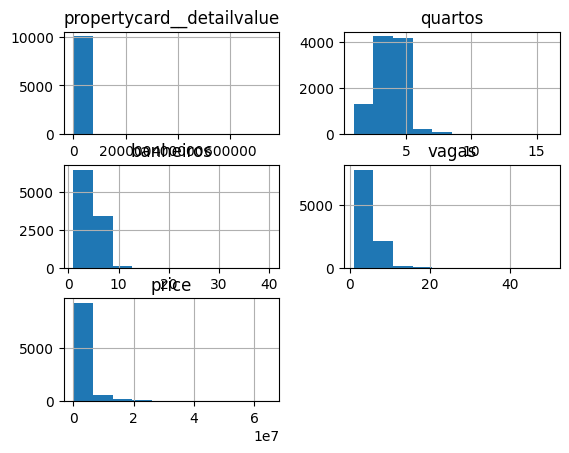

In [ ]:
df.hist()

In [ ]:
df['City'].value_counts()

SP                     3437
Alto de Pinheiros       240
Jardim Guedala          213
Brooklin Paulista       172
Jardim Paulista         167
                       ... 
Vila Campanela            1
Jardim Maria Duarte       1
Jardim Amália             1
A                         1
Carandiru                 1
Name: City, Length: 628, dtype: int64

In [ ]:
df.isna().any()

Street                       False
City                         False
propertycard__detailvalue    False
quartos                      False
banheiros                    False
vagas                        False
price                        False
dtype: bool

In [ ]:
df.isna().sum()

Street                       0
City                         0
propertycard__detailvalue    0
quartos                      0
banheiros                    0
vagas                        0
price                        0
dtype: int64

In [ ]:
df.count()

Street                       10033
City                         10033
propertycard__detailvalue    10033
quartos                      10033
banheiros                    10033
vagas                        10033
price                        10033
dtype: int64

In [ ]:
df

,Street,City,propertycard__detailvalue,quartos,banheiros,vagas,price
0,Avenida Itacira,Planalto Paulista,1000,4,8,6,7000000
1,Rua Aurelia Perez Alvarez,Jardim dos Estados,496,4,4,4,3700000
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,380000
3,Jardim Morumbi São Paulo,SP,310,3,2,4,685000
4,Rua Tobias Barreto,Mooca,100,3,2,2,540000
...,...,...,...,...,...,...,...
10028,Rua Tapuçu,Vila Sofia,90,2,2,2,665000
10029,Rua Guararema,Bosque da Saúde,600,8,7,5,2300000
10030,Rua Estero Belaco,Vila da Saúde,200,3,3,6,1050000
10031,Rua Manuel Onha,Vila Oratório,180,3,2,2,2200


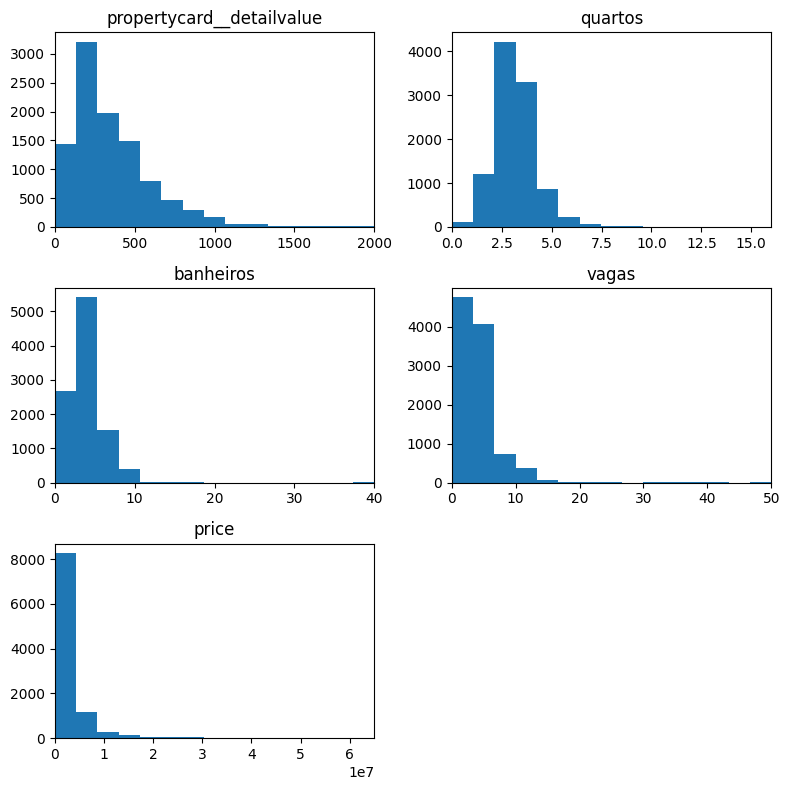

In [ ]:
limites = {
    'propertycard__detailvalue': (0, 2000),
    'quartos': (0, 16),
    'banheiros': (0, 40),
    'vagas': (0, 50),
    'price': (0, 65000000)
}

# Crea una figura para contener todos los subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8,8))
axs = axs.flatten()

# Grafica un histograma para cada característica numérica
for i, feature in enumerate(limites.keys()):
    axs[i].hist(df[feature], bins=15, range=limites[feature])
    axs[i].set_title(feature)
    axs[i].set_xlim(limites[feature])  # Establece los límites del eje x

# Oculta los ejes adicionales si hay alguno
for i in range(len(limites), len(axs)):
    axs[i].set_visible(False)

# Ajusta el layout y muestra la gráfica
plt.tight_layout()
plt.show()

<ipython-input-57-40466b0ed610>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  triangle = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-57-40466b0ed610>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  triangle = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-57-40466b0ed610>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence 

<Axes: >

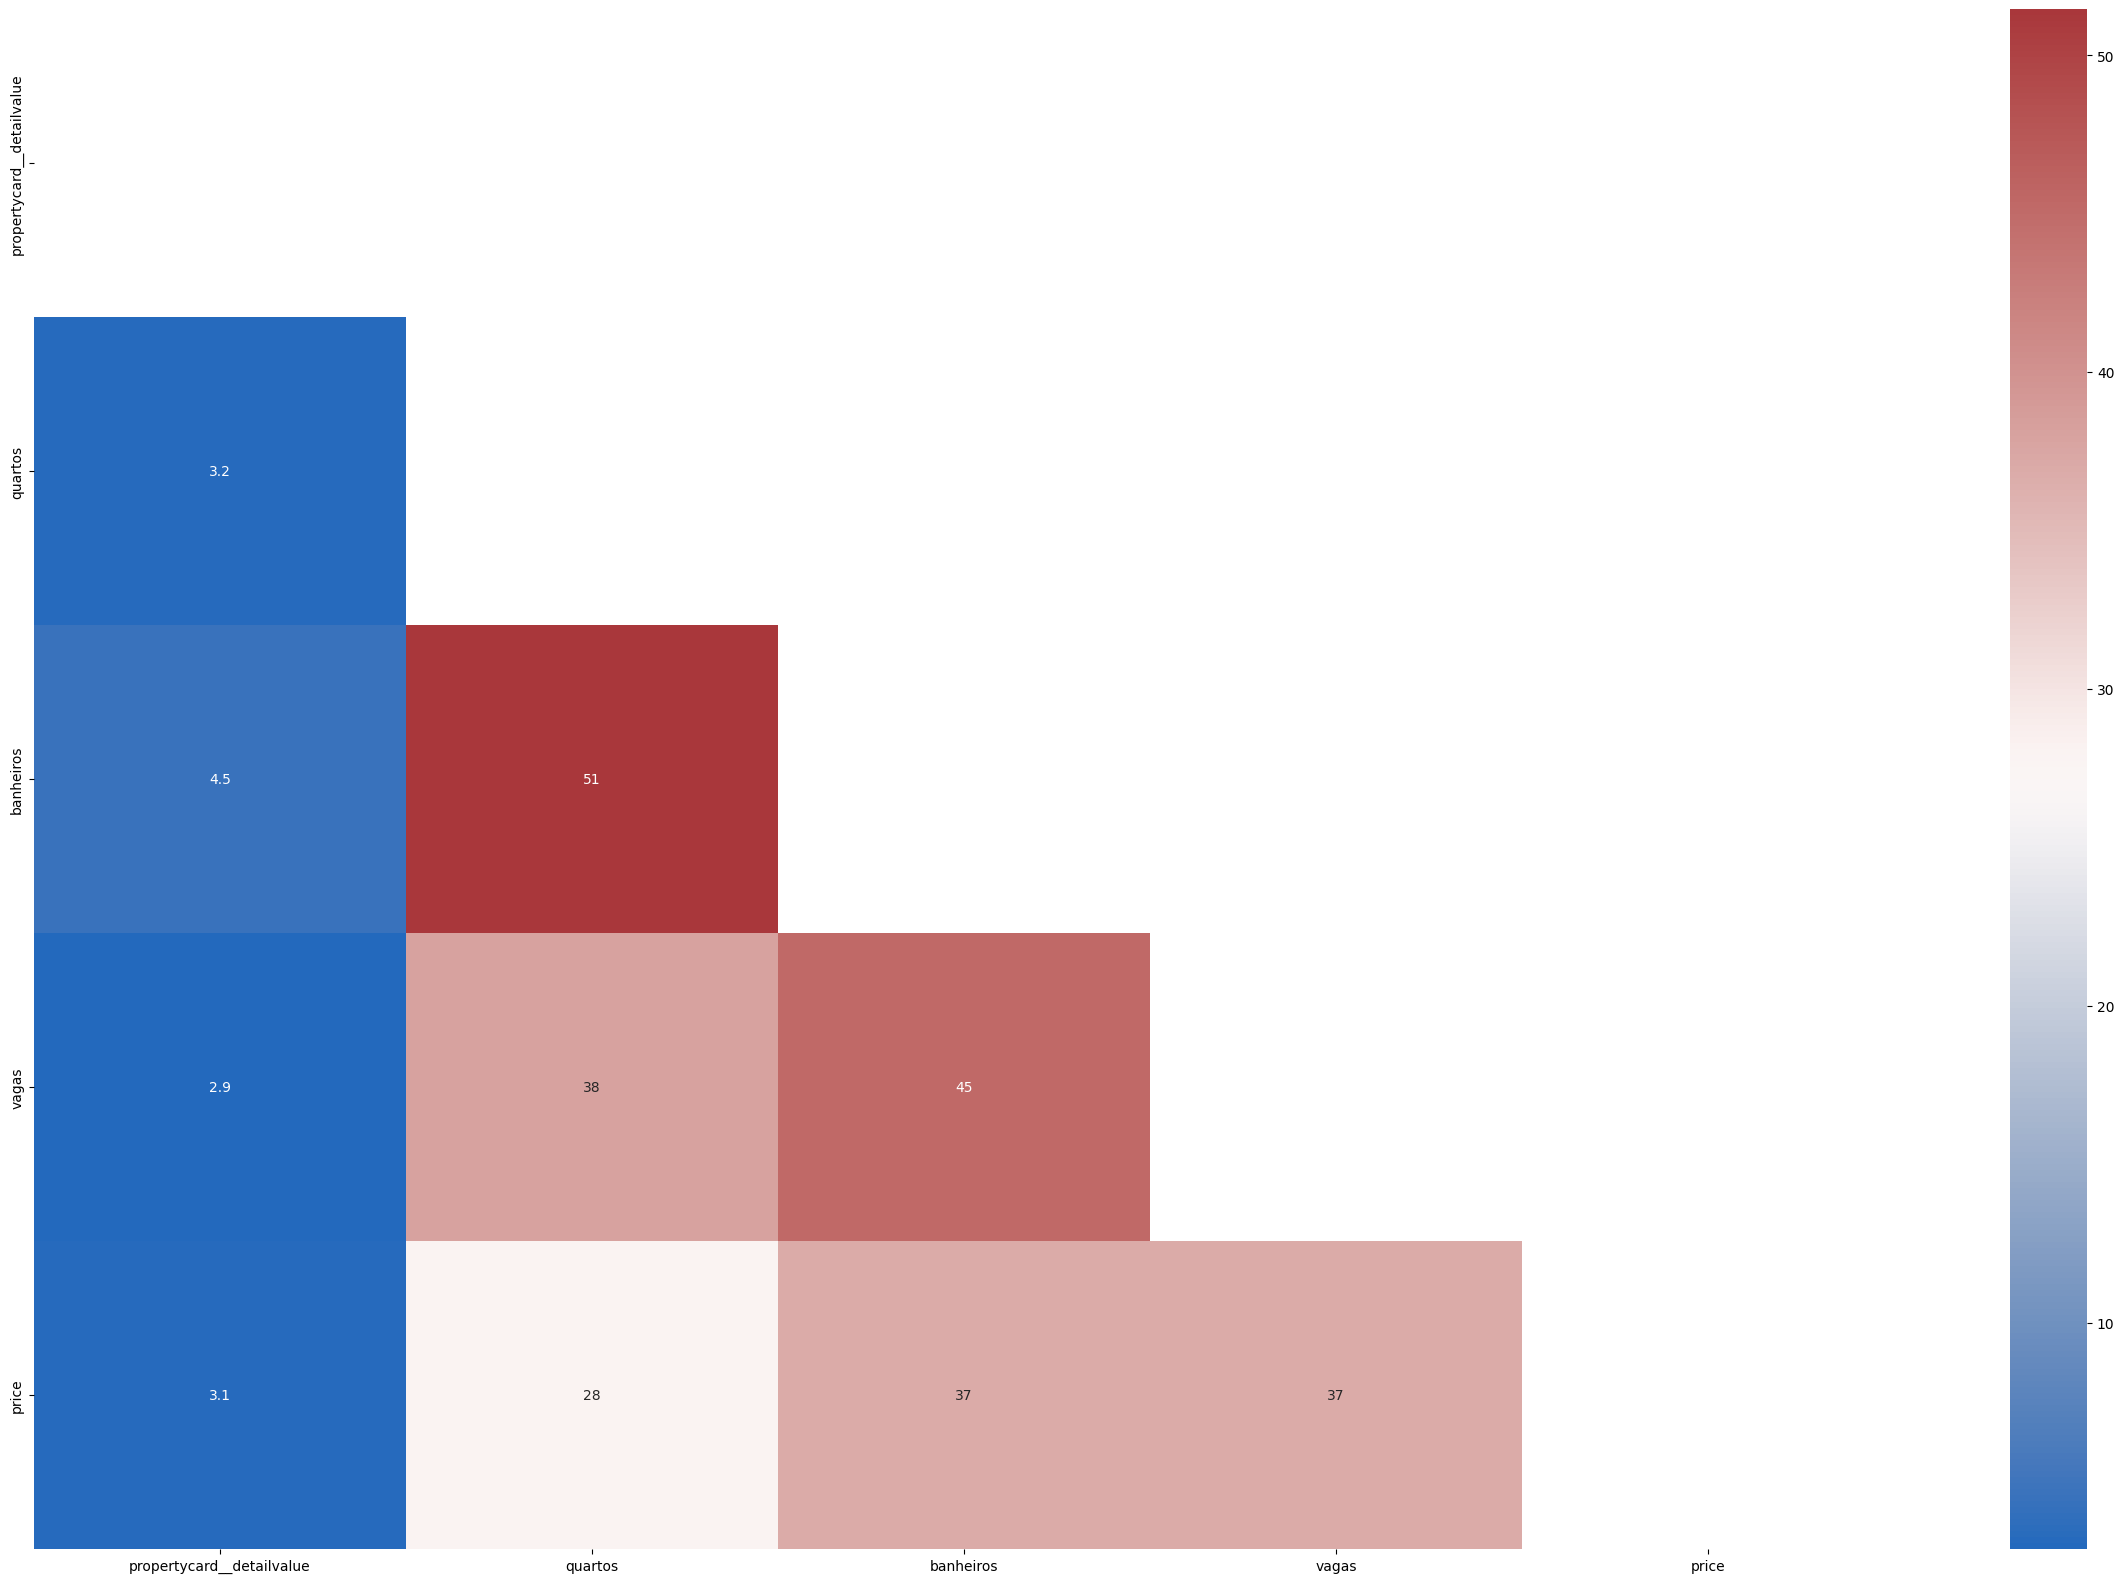

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

triangle = np.zeros_like(df.corr(), dtype=np.bool)
triangle[np.triu_indices_from(triangle)] = True

plt.figure(figsize=(30, 20))
sb.heatmap(df.corr() * 100, annot=True, mask=triangle, cmap='vlag')

In [ ]:
#Dataset procesado
df.to_csv('RealEstateProcessed.csv', index=False)

### **ENTRENAMIENTO DE LOS MODELOS**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definiendo características y objetivo
X = df.drop('price', axis=1)
y = df['price']

# Identificar columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocesador para variables numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


###### **K-NEAREST NEIGHBORS**

In [ ]:
#Import del modelo
from sklearn.neighbors import KNeighborsRegressor

# Creación del modelo KNN
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor(n_neighbors=5))])
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['propertycard__detailvalue', 'quartos', 'banheiros', 'vagas'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Street', 'City'], dtype='object'))])),
                ('regressor', KNeighborsRegressor())])

In [ ]:
new_data = {
    'Street': 'Rua Alba Valdez',
    'City': 'Jardim Reimberg',
    'propertycard__detailvalue': 125,
    'quartos': 4,
    'banheiros': 3,
    'vagas': 2
}

# Convertimos el diccionario en un DataFrame para que coincida con la estructura de entrada que espera nuestro modelo
new_data_df = pd.DataFrame([new_data])

# Usamos el modelo entrenado para hacer una predicción
predicted_price = knn_pipeline.predict(new_data_df)

print(f"El precio de venta predicho para el inmueble es: {predicted_price[0]}")

El precio de venta predicho para el inmueble es: 950000.0


###### **RANDOM FOREST**

In [ ]:
#Import del modelo
from sklearn.ensemble import RandomForestRegressor

# Creación del modelo Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['propertycard__detailvalue', 'quartos', 'banheiros', 'vagas'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Street', 'City'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
new_data = {
    'Street': 'Rua Alba Valdez',
    'City': 'Jardim Reimberg',
    'propertycard__detailvalue': 125,
    'quartos': 4,
    'banheiros': 3,
    'vagas': 2
}

# Convertimos el diccionario en un DataFrame para que coincida con la estructura de entrada que espera nuestro modelo
new_data_df = pd.DataFrame([new_data])

# Usamos el modelo entrenado para hacer una predicción
predicted_price = rf_pipeline.predict(new_data_df)

print(f"El precio de venta predicho para el inmueble es: {predicted_price[0]}")

El precio de venta predicho para el inmueble es: 474150.0


###### **REGRESIÓN LÍNEAL MÚLTIPLE**

In [ ]:
#Import del modelo
from sklearn.linear_model import LinearRegression

# Creación del modelo de regresión lineal
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['propertycard__detailvalue', 'quartos', 'banheiros', 'vagas'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Street', 'City'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
new_data = {
    'Street': 'Rua Alba Valdez',
    'City': 'Jardim Reimberg',
    'propertycard__detailvalue': 125,
    'quartos': 4,
    'banheiros': 3,
    'vagas': 2
}

# Convertimos el diccionario en un DataFrame para que coincida con la estructura de entrada que espera nuestro modelo
new_data_df = pd.DataFrame([new_data])

# Usamos el modelo entrenado para hacer una predicción
predicted_price = linear_pipeline.predict(new_data_df)

print(f"El precio de venta predicho para el inmueble es: {predicted_price[0]}")

El precio de venta predicho para el inmueble es: 380093.4709812405


###### **GRADIENT BOOST**

In [ ]:
#Import del modelo
from sklearn.ensemble import GradientBoostingRegressor

# Creación del modelo Gradient Boosting
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))])
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['propertycard__detailvalue', 'quartos', 'banheiros', 'vagas'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Street', 'City'], dtype='object'))])),
                ('regressor', GradientBoostingRegressor())])

In [ ]:
new_data = {
    'Street': 'Rua Alba Valdez',
    'City': 'Jardim Reimberg',
    'propertycard__detailvalue': 125,
    'quartos': 4,
    'banheiros': 3,
    'vagas': 2
}

# Convertimos el diccionario en un DataFrame para que coincida con la estructura de entrada que espera nuestro modelo
new_data_df = pd.DataFrame([new_data])

# Usamos el modelo entrenado para hacer una predicción
predicted_price = gb_pipeline.predict(new_data_df)

print(f"El precio de venta predicho para el inmueble es: {predicted_price[0]}")

El precio de venta predicho para el inmueble es: 862891.165188574


### **EVALUACIÓN DE LOS MODELOS**

In [ ]:
#Imports para la evalueacion
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###### **K-NEAREST NEIGHBOR**

In [ ]:
y_pred = knn_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R^2: {r2}")
# RMSE: 2458910.3251, MAE: 1259389.6384, R^2: 0.5064

RMSE: 2501533.83493649, MAE: 1275474.3961136024, R^2: 0.4504156715725579


###### **RANDOM FOREST**

In [ ]:
y_pred = rf_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R^2: {r2}")
# RMSE: 1525508.1119, MAE: 742884.3559, R^2: 0.8100

RMSE: 2075057.9058039337, MAE: 910192.8902219383, R^2: 0.6715308231740169


###### **REGRESIÓN LÍNEAL MÚLTIPLE**

In [ ]:
y_pred = linear_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R^2: {r2}")
# RMSE: 2448733.7424, MAE: 1254196.1662, R^2: 0.5105

RMSE: 2465705.867598885, MAE: 1278346.817402128, R^2: 0.4660456675102903


###### **GRADIENT BOOST**

In [ ]:
y_pred = gb_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, MAE: {mae}, R^2: {r2}")
# RMSE: 2200008.3054, MAE: 1231187.8879, R^2: 0.604

RMSE: 2228906.264096127, MAE: 1268432.2333604037, R^2: 0.5636799333656887


## **CROSS-VALIDATION**


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

###### **K-NEAREST NEIGHBOR**

**K-FOLDS**

In [ ]:
# Configurar la validación cruzada K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Ejecutar la validación cruzada K-Fold
kfold_scores = cross_val_score(knn_pipeline, X, y, cv=kf, scoring='r2')

# Imprimir los resultados
print("Validación Cruzada K-Fold - Scores R²:", kfold_scores)
print("Promedio R²:", kfold_scores.mean())
# Validación Cruzada K-Fold - Scores R²: [0.4508 0.3843 0.4872 0.4986 0.4379]
# Promedio R²: 0.45178

Validación Cruzada K-Fold - Scores R²: [0.45081399 0.38430525 0.48724702 0.49860799 0.43792501]
Promedio R²: 0.45177985427959033


###### **RANDOM FOREST**

**K-FOLDS**

In [ ]:
# Configurar la validación cruzada K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Ejecutar la validación cruzada K-Fold
kfold_scores = cross_val_score(rf_pipeline, X, y, cv=kf, scoring='r2')

# Imprimir los resultados
print("Validación Cruzada K-Fold - Scores R²:", kfold_scores)
print("Promedio R²:", kfold_scores.mean())
# Validación Cruzada K-Fold - Scores R²: [0.7437 0.7043 0.7285 0.6950 0.5961]
# Promedio R²: 0.6935

Validación Cruzada K-Fold - Scores R²: [0.74618422 0.70719858 0.7299055  0.7112973  0.58718171]
Promedio R²: 0.6963534629862446


###### **REGRESIÓN LINEAL MÚLTIPLE**

**K-FOLDS**

In [ ]:
# Configurar la validación cruzada K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Ejecutar la validación cruzada K-Fold
kfold_scores = cross_val_score(linear_pipeline, X, y, cv=kf, scoring='r2')

# Imprimir los resultados
print("Validación Cruzada K-Fold - Scores R²:", kfold_scores)
print("Promedio R²:", kfold_scores.mean())
# Validación Cruzada K-Fold - Scores R²: [ 0.4660  0.4738  0.3164 -6.8446  0.42646]
# Promedio R²: -1.0323

Validación Cruzada K-Fold - Scores R²: [ 0.46604804  0.47385402  0.31638626 -6.84459366  0.42646207]
Promedio R²: -1.0323686547353188


###### **GRADIENT BOOST**

**K-FOLDS**

In [ ]:
# Configurar la validación cruzada K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Ejecutar la validación cruzada K-Fold
kfold_scores = cross_val_score(gb_pipeline, X, y, cv=kf, scoring='r2')

# Imprimir los resultados
print("Validación Cruzada K-Fold - Scores R²:", kfold_scores)
print("Promedio R²:", kfold_scores.mean())
# Validación Cruzada K-Fold - Scores R²: [0.5639 0.5866 0.5880 0.6034 0.5019 ]
# Promedio R²: 0.5688

Validación Cruzada K-Fold - Scores R²: [0.56273238 0.58515758 0.58821208 0.60347531 0.50163586]
Promedio R²: 0.568242641058062
